# BAIT509 Group Project
primary goal, target variable: da013, did people participate in physical examination in the last 5 years

## 1. Data Preprocessing

## 1. 1 fetching data from SQL server

In [1]:
# create sql connection
from sqlalchemy import create_engine
import pandas as pd
import json
import urllib.parse
import psycopg2
import os 
with open("credentials.json") as file:
    login = json.load(file)
    
username = login['user']
password = urllib.parse.quote(login['password'])
host = login['host']
port = login['port']

engine = create_engine("postgresql://{}:{}@{}:{}/postgres".format(username,password,host,port))

In [2]:
# merge data
if 'df.csv' not in os.listdir():
    with engine.connect() as cnn:
        """
        With any proxy parameter == TRUE, this questionnair is answered by others, so we will drop them all
        """
        df = pd.read_sql("""
                            SELECT 
                                a."UID",
                                a."householdUID", 
                                a."communityUID",
                                proxy_2,
                                ba001,
                                ba009,
                                ba011,
                                ba014,
                                ba015,
                                ba016,
                                ba017,
                                proxy,
                                proxy_5,
                                da001,
                                da002_1_,
                                da002_2_,
                                da002_3_,
                                da002_4_,
                                da002_5_,
                                da002_6_,
                                da002_7_,
                                da002_8_,
                                da002_9_,
                                da002_10_,
                                da002_11_,
                                da002_12_,
                                da002_13_,
                                da002_14_,
                                da013,
                                da019,
                                da022,
                                da025,
                                da027,
                                da029,
                                da030,
                                da031,
                                da038_s1,
                                da038_s2,
                                da038_s3,
                                da038_s4,
                                da038_s5,
                                da038_s6,
                                da038_s7,
                                da038_s8,
                                da038_s9,
                                da040,
                                da050_1,
                                da051,
                                db001,
                                db003,
                                db005,
                                db007,
                                db009,
                                db011,
                                db012,
                                db014,
                                db016,
                                db018,
                                db020,
                                db022,
                                fa001,
                                fc006,
                                fc008
                            from charles.work_retirement a
                            join charles.health_status_and_functioning using("UID")
                            join charles.demographic_background using("UID")
                                        """, con = cnn)
        df.to_csv('df.csv')
else:
    pass

### 1.2. Drop unrelative data

In [3]:
# drop survey done by others
df = pd.read_csv('df.csv', index_col=0)
proxy_var = ['proxy','proxy_2','proxy_5']
mask = df[proxy_var].apply(lambda x: x.str.contains('1 Yes')).any(axis=1)
df = df[~mask].drop(labels=proxy_var, axis=1)

* Now based on data types, will will process different proprecessing for them:
    * imputer
    * binary: keep it with 0 or 1
    * categorical:
      * if with meaning, use ordinal encode, positive impact with larger number
      * if not, use one-hot encode
    * numerical:
      * scalar


### 1.3. Transform data from string to numeric data

In [4]:
df.iloc[:,3:].apply(lambda x: x.unique())

ba001                                       [1 Male, 2 Female]
ba009        [2 Non-Agricultural HuKou, 3 Unified Residence...
ba011        [1 Married with Spouse Present, 4 Divorced, 5 ...
ba014        [1 One Month, Participate in the Endowment Ins...
ba015        [2 Worker's Basic Endownment Insurace, 3 Socia...
ba016        [2 No Need to Pay, 1 Cost Per Year, 3 No Socia...
ba017                      [5.0, 3.0, 1.0, nan, 4.0, 2.0, 6.0]
da001        [1 Very Good, 3 Fair, 4 Poor, 2 Good, 5 Very P...
da002_1_     [nan, 3 Same, 1 Better, 2 Worse, 99 Never Had ...
da002_2_     [3 Same, nan, 1 Better, 2 Worse, 99 Never Had ...
da002_3_     [nan, 2 Worse, 3 Same, 99 Never Had the Diseas...
da002_4_     [nan, 1 Better, 3 Same, 99 Never Had the Disea...
da002_5_     [nan, 99 Never Had the Disease, 3 Same, 1 Bett...
da002_6_     [nan, 99 Never Had the Disease, 3 Same, 1 Bett...
da002_7_     [nan, 3 Same, 2 Worse, 1 Better, 99 Never Had ...
da002_8_     [nan, 1 Better, 3 Same, 99 Never Had the D

### 1.4. Fill NaN and Error values

Based on the survey, we decided to apply different fill na strategies to keep all columns ordinal.

| Column    | Non-Null Count | Data Type | Fill Strategy                                |
|-----------|----------------|-----------|----------------------------------------------|
| ba015     | 14982          | object    | fill 0                                       |
| ba017     | 16764          | float64   | fill 0                                       |
| da002_1_  | 5896           | object    | fill 99 then replace to 0, same for all da002_x_ |
| da002_2_  | 3457           | object    |                                              |
| da002_3_  | 1965           | object    |                                              |
| da002_4_  | 308            | object    |                                              |
| da002_5_  | 2041           | object    |                                              |
| da002_6_  | 1068           | object    |                                              |
| da002_7_  | 2992           | object    |                                              |
| da002_8_  | 982            | object    |                                              |
| da002_9_  | 1482           | object    |                                              |
| da002_10_ | 4941           | object    |                                              |
| da002_11_ | 291            | object    |                                              |
| da002_12_ | 12             | object    |                                              |
| da002_13_ | 285            | object    |                                              |
| da002_14_ | 6085           | object    |                                              |
| da013     | 17472          | object    | fill 2                                       |
| da019     | 17472          | object    | fill 2                                       |
| da022     | 17472          | object    | fill 2                                       |
| da025     | 17472          | object    | fill 2                                       |
| da027     | 17559          | object    | fill 1                                       |
| da029     | 17559          | object    | fill 3                                       |
| da030     | 17558          | float64   | fill mean if necessary                       |
| da031     | 17558          | float64   | fill mean if necessary                       |
| da038_s1  | 17555          | object    | fill 0 for all da038                         |
| da038_s2  | 17555          | object    |                                              |
| da038_s3  | 17555          | object    |                                              |
| da038_s4  | 17555          | object    |                                              |
| da038_s5  | 17555          | object    |                                              |
| da038_s6  | 17555          | object    |                                              |
| da038_s7  | 17555          | object    |                                              |
| da038_s8  | 17555          | object    |                                              |
| da038_s9  | 17555          | object    |                                              |
| da040     | 17555          | object    |                                              |
| da050_1   | 4494           | float64   | fill 0                                       |
| da051     | 17555          | object    | fill 3                                       |
| db001     | 17555          | object    | fill 1 for all db0XX                         |
| db003     | 17555          | object    |                                              |
| db005     | 17555          | object    |                                              |
| db007     | 17555          | object    |                                              |
| db009     | 17555          | object    |                                              |
| db011     | 17555          | object    |                                              |
| db012     | 17555          | object    |                                              |
| db014     | 17555          | object    |                                              |
| db016     | 17555          | object    |                                              |
| db018     | 17555          | object    |                                              |
| db020     | 17555          | object    |                                              |
| db022     | 17555          | object    |                                              |
| fa001     | 17562          | object    |                                              |
| fc006     | 397            | object    | fill 2                                       |
| fc008     | 344            | object    | fill 2                                       |


In [5]:
# for different columns we will apply different strategies
fillna0 = ['ba015','ba017']+['da038_s'+str(i) for i in range(1,10)]+['da050_1']
fillna1 = ['da027']+['db00'+str(i*2+1) for i in range(1,5)]+['db011']+['db0'+str(i*2) for i in range(6,12)]
fillna2 = ['da013','da019','da022','da025','fc006','fc008']
fillna3 = ['da029','da051']
fillna99_0 = ['da002_'+str(i)+'_' for i in range(1,15)]
fillna_mean = ['da030','da031']
dropna = ['fa001','da040','da001']

In [6]:
# firstly, for all elements we only want the first number of all string
df = df.applymap(lambda x: x.split()[0] if isinstance(x, str) else x) 
df = df.applymap(lambda x: float(x) if isinstance(x,str) and len(x)<4 else x)

In [7]:
# we still have some non numeric rows, we will deal with it separately
df.ba014.unique()

# since Participate means the man haven't meet the pension age, so we manually assign it with 6 with means better than no pension but worse than have received pension now,
df.ba014 = df.ba014.replace('Participate',6)

In [8]:
# now we will fill NaN with rules we have established before
fill_na_list = {i:0 for i in fillna0} | {i:1 for i in fillna1} | {i:2 for i in fillna2} | {i:3 for i in fillna3} | {i:99 for i in fillna99_0} 
df.fillna(value=fill_na_list, inplace = True)
df = df.dropna(subset = dropna)

In [9]:
# check if null
df.isnull().sum().sum()

0

In [10]:
# let us to the check again 
df.iloc[:,3:].apply(lambda x: x.unique())

ba001                                               [1.0, 2.0]
ba009                                     [2.0, 3.0, 1.0, 4.0]
ba011                           [1.0, 4.0, 5.0, 6.0, 2.0, 3.0]
ba014                      [1.0, 6.0, 2.0, 7.0, 4.0, 3.0, 5.0]
ba015                      [2.0, 3.0, 1.0, 0.0, 4.0, 5.0, 6.0]
ba016                                          [2.0, 1.0, 3.0]
ba017                      [5.0, 3.0, 1.0, 0.0, 4.0, 2.0, 6.0]
da001                         [1.0, 3.0, 4.0, 2.0, 5.0, 997.0]
da002_1_                                 [99.0, 3.0, 1.0, 2.0]
da002_2_                                 [3.0, 99.0, 1.0, 2.0]
da002_3_                                 [99.0, 2.0, 3.0, 1.0]
da002_4_                                 [99.0, 1.0, 3.0, 2.0]
da002_5_                                 [99.0, 3.0, 1.0, 2.0]
da002_6_                                 [99.0, 3.0, 1.0, 2.0]
da002_7_                                 [99.0, 3.0, 2.0, 1.0]
da002_8_                                 [99.0, 1.0, 3.

We still have some columns contain 997 which means don't know, we will drop them. While some others contain 99 which means they never have this disease, we will fill it with 0 which accord with the original ordinal;

In [11]:
df[fillna99_0] = df[fillna99_0].replace(99,0)

# we will not directly apply mean function for da029 because we don't want to break the golden rules
# Since da001 is our target label, we don't want a blur answer, so we will just drop those da001 that equals to 997
# df['da001'] = df['da001'].replace(997,df.da001[df.da001!=997].mean())
# df['da029'] = df['da029'].replace(997,df.da029[df.da029!=997].mean())

df = df.loc[df.da001!=997]
df = df.loc[df.da029!=997]

In [12]:
# final check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14707 entries, 0 to 19344
Data columns (total 60 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UID           14707 non-null  int64  
 1   householdUID  14707 non-null  int64  
 2   communityUID  14707 non-null  int64  
 3   ba001         14707 non-null  float64
 4   ba009         14707 non-null  float64
 5   ba011         14707 non-null  float64
 6   ba014         14707 non-null  float64
 7   ba015         14707 non-null  float64
 8   ba016         14707 non-null  float64
 9   ba017         14707 non-null  float64
 10  da001         14707 non-null  float64
 11  da002_1_      14707 non-null  float64
 12  da002_2_      14707 non-null  float64
 13  da002_3_      14707 non-null  float64
 14  da002_4_      14707 non-null  float64
 15  da002_5_      14707 non-null  float64
 16  da002_6_      14707 non-null  float64
 17  da002_7_      14707 non-null  float64
 18  da002_8_      14707 non-null  f

In [13]:
df.apply(lambda x: x.unique())

UID             [94004126001, 94004126002, 94004111001, 940041...
householdUID    [940041260, 940041110, 940041140, 940041190, 9...
communityUID    [940041, 940043, 940042, 1940372, 1940373, 640...
ba001                                                  [1.0, 2.0]
ba009                                        [2.0, 3.0, 1.0, 4.0]
ba011                              [1.0, 4.0, 5.0, 6.0, 2.0, 3.0]
ba014                         [1.0, 6.0, 2.0, 7.0, 4.0, 3.0, 5.0]
ba015                         [2.0, 3.0, 1.0, 0.0, 4.0, 5.0, 6.0]
ba016                                             [2.0, 1.0, 3.0]
ba017                         [5.0, 3.0, 1.0, 0.0, 4.0, 2.0, 6.0]
da001                                   [1.0, 3.0, 4.0, 2.0, 5.0]
da002_1_                                     [0.0, 3.0, 1.0, 2.0]
da002_2_                                     [3.0, 0.0, 1.0, 2.0]
da002_3_                                     [0.0, 2.0, 3.0, 1.0]
da002_4_                                     [0.0, 1.0, 3.0, 2.0]
da002_5_  

Now we have transfromed nearly all of them data into numeric. Each of them could be classified to 3 groups:
* Binary with 0 and 1
* Ordianl Encode with more than 2 possible numbers but less than 7.
* Community UID, which we will apply one hot encode in the pipeline.
* *Real* numeric data: da030, da031,da050_1
* Identity columns as Person id, family id and community id. We will drop the first two but keep the last one, because we believe there might soma pattern exists for predicting our target
  
For those real numeric columns, we will scale them later.

In [14]:
df = df.drop(['UID','householdUID'], axis=1)

## 2. Train and Test set split


In [15]:
# import a custom function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import altair as alt
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.join(os.path.abspath("."), "code"))
from code.plotting_functions import *
from code.utils import *

In [16]:
to_be_scalar = ['da030','da031','da050_1']
target_variable = 'da013'
# Split the dataset into 80% train and 20% test 
# y = df[target_variable].apply(lambda x:1 if x<=3 else 0)
y = df[target_variable]
X = df.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=711)

In [17]:
display(X_train)
display(y_test)

,communityUID,ba001,ba009,ba011,ba014,ba015,ba016,ba017,da001,da002_1_,...,db011,db012,db014,db016,db018,db020,db022,fa001,fc006,fc008
16819,140312,2.0,1.0,1.0,6.0,4.0,1.0,4.0,3.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
17042,104463,1.0,1.0,5.0,1.0,5.0,1.0,2.0,4.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0
6704,304762,1.0,1.0,1.0,1.0,4.0,2.0,4.0,3.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
15450,586591,2.0,2.0,1.0,1.0,5.0,2.0,2.0,3.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
9605,3240783,2.0,2.0,1.0,7.0,0.0,1.0,3.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,3263462,1.0,1.0,5.0,4.0,4.0,1.0,4.0,3.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
19189,1940371,1.0,1.0,1.0,6.0,2.0,2.0,1.0,3.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
17226,182061,1.0,1.0,1.0,2.0,4.0,1.0,4.0,3.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
3110,2111763,1.0,1.0,1.0,7.0,0.0,2.0,4.0,4.0,0.0,...,2.0,3.0,4.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0


9119     2.0
4948     1.0
7001     1.0
6532     1.0
7823     2.0
        ... 
426      1.0
5287     2.0
16059    2.0
11667    1.0
7174     2.0
Name: da013, Length: 2942, dtype: float64

## 3. model

### 3.1 DummyClassifier

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

col_transformer = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, to_be_scalar),
        ("categorical", categorical_transformer, ['communityUID'])
    ],
    remainder='passthrough'
)

dmc_pipe = make_pipeline(
    col_transformer,DummyClassifier(strategy='most_frequent')
)
dmc_cv = cross_validate(dmc_pipe, X_train, y_train,cv=10,return_train_score=True)
print("validation score:")
display(pd.DataFrame(dmc_cv))
dmc_pipe.fit(X_train,y_train)
print("test score:")
dmc_pipe.score(X_test,y_test)

validation score:


,fit_time,score_time,test_score,train_score
0,0.021997,0.004728,0.526763,0.526634
1,0.020744,0.004569,0.526763,0.526634
2,0.019662,0.005010,0.526763,0.526634
3,0.020199,0.005062,0.526763,0.526634
4,0.019263,0.004065,0.526763,0.526634
5,0.018874,0.004511,0.527211,0.526584
6,0.017591,0.004208,0.526361,0.526679
7,0.017449,0.004221,0.526361,0.526679
8,0.018487,0.005245,0.526361,0.526679
9,0.017713,0.004569,0.526361,0.526679


test score:


0.5343303874915024

This model has nearly 53% hit rate -> better than flip a coin

### 3.2. KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

knn_pipe = Pipeline(
   steps=[("col_tran",col_transformer),("knn",KNeighborsClassifier())]
)

knn_para = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

knn_opt = RandomizedSearchCV(knn_pipe, knn_para, cv=3, verbose=2, n_jobs=-1, n_iter=5)
knn_opt.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[CV] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform; total time=   3.0s
[CV] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform; total time=   3.0s
[CV] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform; total time=   3.0s
[CV] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance; total time=   3.0s
[CV] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance; total time=   3.0s
[CV] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance; total time=   2.8s
[CV] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance; total time=   2.9s
[CV] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance; total time=   2.9s
[CV] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance; total time=   2.9s
[CV] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform; total time=  29.1s
[CV] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights

In [20]:
knn_cv = cross_validate(knn_opt.best_estimator_, X_train, y_train,cv=10,return_train_score=True)

In [21]:
pd.DataFrame(knn_cv)

,fit_time,score_time,test_score,train_score
0,0.021585,0.453521,0.584537,1.0
1,0.023355,0.242667,0.575191,1.0
2,0.022915,0.252184,0.587086,1.0
3,0.019690,0.183339,0.589635,1.0
4,0.019261,0.178247,0.587935,1.0
5,0.018789,0.183675,0.559524,1.0
6,0.018828,0.191091,0.586735,1.0
7,0.018710,0.175024,0.568027,1.0
8,0.019848,0.185670,0.579932,1.0
9,0.018963,0.178479,0.577381,1.0


In [22]:
knn_opt.best_estimator_.score(X_test,y_test)

0.5720598232494901

In [23]:
knn_opt.best_params_

{'knn__weights': 'distance', 'knn__n_neighbors': 9, 'knn__metric': 'manhattan'}

The result is 1000% overfitting, this model is not working

### 3.3. DecisionTree

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_pipe = Pipeline(steps=[('col',col_transformer),('tree',DecisionTreeClassifier())])

tree_param = {
    'tree__max_depth': [None, 5, 10, 15, 20, 25, 30]
}

tree_opt = RandomizedSearchCV(tree_pipe,tree_param, cv=3, verbose=2, n_jobs=-1, n_iter=5)
tree_opt.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .................................tree__max_depth=15; total time=   0.1s
[CV] END .................................tree__max_depth=15; total time=   0.1s
[CV] END .................................tree__max_depth=15; total time=   0.1s
[CV] END .................................tree__max_depth=30; total time=   0.2s
[CV] END .................................tree__max_depth=30; total time=   0.2s
[CV] END .................................tree__max_depth=30; total time=   0.2s
[CV] END ..................................tree__max_depth=5; total time=   0.1s
[CV] END .................................tree__max_depth=25; total time=   0.2s
[CV] END ..................................tree__max_depth=5; total time=   0.1s
[CV] END .................................tree__max_depth=25; total time=   0.2s
[CV] END .................................tree__max_depth=20; total time=   0.2s
[CV] END ..................................tree__

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('col',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['da030',
                                                                                'da031',
                                                                                'da050_1']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['communityUID'])])),
                                             ('tree',
                                              DecisionTreeClassifier())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'tree__max_depth': [None, 5, 10, 15, 20,
                                                            25, 30]},
                   verbose=2)

In [25]:
tree_cv = cross_validate(tree_opt.best_estimator_,X_train,y_train,cv=10,return_train_score=True)
pd.DataFrame(tree_cv).mean()


fit_time       0.045963
score_time     0.004346
test_score     0.600933
train_score    0.619087
dtype: float64

In [26]:
tree_opt.score(X_test,y_test)

0.6077498300475866

The decision tree model has no overfitting or underfitting problems, the result accuracy is a little bit higher than 

### 3.4 SVM

In [27]:
from sklearn.svm import SVC

svc_pipe = make_pipeline(col_transformer,SVC())

svc_para={'svc__C': [0.1, 1.0, 10, 100],'svc__gamma': [0.1, 1.0, 10, 100]}
svc_opt = RandomizedSearchCV(svc_pipe,svc_para, cv=3, verbose=2, n_jobs=-1, n_iter=5)
svc_opt.fit(X_train,y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .........................svc__C=1.0, svc__gamma=100; total time=   8.4s
[CV] END .........................svc__C=1.0, svc__gamma=100; total time=   8.7s
[CV] END .........................svc__C=1.0, svc__gamma=100; total time=   8.7s
[CV] END ..........................svc__C=10, svc__gamma=0.1; total time=  11.1s
[CV] END ..........................svc__C=10, svc__gamma=0.1; total time=  11.1s
[CV] END ..........................svc__C=10, svc__gamma=0.1; total time=  11.2s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   6.9s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   7.0s
[CV] END .........................svc__C=100, svc__gamma=1.0; total time=  16.7s
[CV] END .........................svc__C=100, svc__gamma=1.0; total time=  17.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   6.5s
[CV] END .........................svc__C=100, svc

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['da030',
                                                                                'da031',
                                                                                'da050_1']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['communityUID'])])),
                                             ('svc', SVC())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'svc__C': [0.1, 1.0, 10, 100],
                                        'svc__gamma': [0.1, 1.0, 10, 100]},
                   verbose=2)

In [28]:
svc_cv = cross_validate(svc_opt.best_estimator_,X_train,y_train,cv=10,return_train_score=True)
pd.DataFrame(svc_cv).mean()


fit_time       23.835082
score_time      0.603705
test_score      0.573226
train_score     1.000000
dtype: float64

In [29]:
svc_opt.score(X_test,y_test)

0.5798776342624066

The same, no better than dummy classifier

In [30]:
svc_opt.best_params_

{'svc__gamma': 0.1, 'svc__C': 10}

### 3.5 Linear Regression

In [31]:
from sklearn.linear_model import LogisticRegression

logi_pipe = make_pipeline(col_transformer,LogisticRegression(max_iter=10000))

logi_params = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

logi_opt = GridSearchCV(logi_pipe,logi_params, cv=10, verbose=2, n_jobs=-1)
logi_opt.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END ........................logisticregression__C=0.001; total time=   0.2s
[CV] END ........................logisticregression__C=0.001; total time=   0.2s
[CV] END ........................logisticregression__C=0.001; total time=   0.2s
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END ........................logisticregression__C=0.001; total time=   0.1s
[CV] END .........................logisticregression__C=0.01; total time=   0.2s
[CV] END .........................logisticregres

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['da030',
                                                                          'da031',
                                                                          'da050_1']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['communityUID'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100]},
             verbose=2)

In [32]:
logi_cv = cross_validate(logi_opt.best_estimator_,X_train,y_train,cv=10,return_train_score=True)
pd.DataFrame(logi_cv).mean()

fit_time       1.036903
score_time     0.004459
test_score     0.632724
train_score    0.673891
dtype: float64

The score seems good.

## 4. Models evaluation and selection 

We have several ways to evaluate and select the final 

### 4.1 accuracy and proper fitting meature

In [50]:

list_cv = [dmc_cv, knn_cv, tree_cv, svc_cv, logi_cv]
columns = ['fit_time', 'score_time', 'test_score', 'train_score']
model_names = ['DMC', 'KNN', 'Tree', 'SVC', 'Logistic']  # Add model names for clarity

# Create a DataFrame for each model's CV results and compute the mean of each metric
# Now also including model names to keep track of each row
compare_cv = pd.concat([pd.DataFrame(i, columns=columns).mean() for i in list_cv], axis=1)

# Transpose the DataFrame to have models as rows and metrics as columns
compare_cv = compare_cv.T

# Assign model names to the index for clarity
compare_cv.index = model_names

compare_cv['overfitting'] = (compare_cv.train_score - compare_cv.test_score) / compare_cv.train_score * 100
compare_cv['betterThanDummy'] = (compare_cv.test_score - compare_cv.test_score[0]) / compare_cv.test_score[0] * 100
compare_cv

,fit_time,score_time,test_score,train_score,overfitting,betterThanDummy
DMC,0.019198,0.004619,0.526647,0.526647,0.000009,0.000000
KNN,0.020194,0.222390,0.579598,1.000000,42.040173,10.054458
Tree,0.045963,0.004346,0.600933,0.619087,2.932319,14.105549
SVC,23.835082,0.603705,0.573226,1.000000,42.677365,8.844555
Logistic,1.036903,0.004459,0.632724,0.673891,6.108968,20.141937


### 4.2 Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

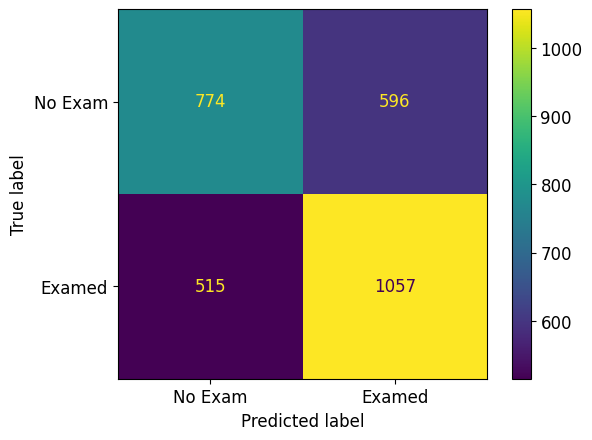

In [54]:
cm = confusion_matrix(y_test, logi_opt.best_estimator_.predict(X_test))
plt.rc('font', size=12) # bigger font sizes
ConfusionMatrixDisplay(cm, display_labels=["No Exam", "Examed"]).plot()

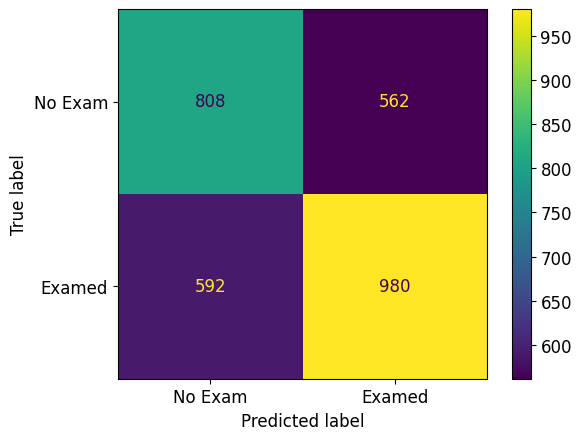

In [55]:
cm = confusion_matrix(y_test, tree_opt.best_estimator_.predict(X_test))
plt.rc('font', size=12) # bigger font sizes
ConfusionMatrixDisplay(cm, display_labels=["No Exam", "Examed"]).plot()

In [57]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        logi_opt.best_estimator_.predict(X_test),
        target_names=["No Exam", "Examed"]
    )
)

print(
    classification_report(
        y_test,
        tree_opt.best_estimator_.predict(X_test),
        target_names=["No Exam", "Examed"]
    )
)

              precision    recall  f1-score   support

     No Exam       0.60      0.56      0.58      1370
      Examed       0.64      0.67      0.66      1572

    accuracy                           0.62      2942
   macro avg       0.62      0.62      0.62      2942
weighted avg       0.62      0.62      0.62      2942

              precision    recall  f1-score   support

     No Exam       0.58      0.59      0.58      1370
      Examed       0.64      0.62      0.63      1572

    accuracy                           0.61      2942
   macro avg       0.61      0.61      0.61      2942
weighted avg       0.61      0.61      0.61      2942



Logistic Regression Model
Precision: Average precision is similar for both classes, with a slightly higher precision for "Examed" (0.64).
Recall: Slightly favors "Examed" with a recall of 0.67, indicating it's slightly better at identifying true positives for "Examed" than for "No Exam".
F1-Score: Higher for "Examed" (0.66) compared to "No Exam" (0.58), suggesting a better balance between precision and recall for "Examed".
Accuracy: Overall accuracy is 0.62, indicating that 62% of the predictions were correct.
Decision Tree Model
Precision: Similar to the logistic regression model, but with a slight decrease in precision for "Examed".
Recall: The recall for "No Exam" is slightly higher than for the logistic regression model, indicating it's slightly better at identifying true positives for "No Exam".
F1-Score: The f1-scores are very close to those of the logistic regression model but slightly lower for both classes.
Accuracy: Overall accuracy is 0.61, slightly lower than the logistic regression model.
Evaluation and Comparison
Accuracy: Both models have similar accuracy, with logistic regression slightly outperforming the decision tree (0.62 vs. 0.61).
Precision and Recall: The logistic regression model shows a balanced performance between the two classes and slightly outperforms the decision tree in precision for "Examed" and recall for the same class.
F1-Score: Reflects a balance of precision and recall, with the logistic regression model showing a slightly better performance for "Examed".
Conclusion: The logistic regression model performs slightly better overall, considering the balance between precision, recall, and the higher f1-scores for both classes. While the differences are not substantial, the logistic regression model's slightly higher accuracy and balanced performance across metrics suggest it is the better model of the two for this specific evaluation. However, the choice between models could also be influenced by other factors such as the cost of false positives vs. false negatives, the interpretability of the model, and how the model fits into the larger application context.

## 5. The most importance feature

### 5.1 Tree features


In [86]:
# Step 1 & 2: Access the Decision Tree model from the best estimator of RandomizedSearchCV
best_tree = tree_opt.best_estimator_.named_steps['tree']  # Replace 'decision_tree' with the actual name you used in your pipeline

# Step 3: Get feature importances
feature_importances = best_tree.feature_importances_

# Ensure that you have feature names available, for instance, from your X_train DataFrame
feature_names = X_train.columns

# Step 4: Sort the features by their importance and identify the top 10
important_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 important features
for feature, importance in important_features:
    print(f"{feature}: {importance}")


ba009: 0.041849088537890086
communityUID: 0.02141437138550713
da002_11_: 0.01688591378938467
ba001: 0.0
ba011: 0.0
ba014: 0.0
ba015: 0.0
ba016: 0.0
ba017: 0.0
da001: 0.0
